#### Motivation

UCB is similar to optimistic initial value, but with an educated guess of it.
En vez de hablar intervalos de confianza, hablaremos de desigualdades.  
La idea general es: $P(\text{sample mean} - \text{true mean} \geq \text{error}) \leq f(\text{error})$.
* Markov inequality: decreses proportional to 1/t
* Chebysheb inequality: decreses proportional to 1/t²
* Hoeffding's inequality: Exponential (UCB1!!!)

Hoeffding's Inequality states that for a sum of independent and bounded random variables $(X_1, X_2, \ldots, X_n)\ with \ (a_i \leq X_i \leq b_i)\  \forall  (i)$, the following inequality holds for any \(t > 0\):

$$ P\left(\frac{1}{n}\sum_{i=1}^{n} X_i - \mathbb{E}[X_i] \geq t\right) \leq e^{-2nt^2/\sum_{i=1}^{n}(b_i - a_i)^2} $$

or, for the opposite tail,

$$ P\left(\frac{1}{n}\sum_{i=1}^{n} X_i - \mathbb{E}[X_i] \leq -t\right) \leq e^{-2nt^2/\sum_{i=1}^{n}(b_i - a_i)^2} $$

This inequality is valuable in many areas of statistics and machine learning where you need to estimate the difference between sample means and population means.

Para nuestro curso, solo usamos la versión sin parámetros $a_{i}$ y $b_{i}$, por lo que la formula se simplifica un poco suponiendo que ese divisor del exponente de la RHS es igual a 1.

#### Pseudo-código:
Se ve muy similar a algoritmos anteriores, pero ahora depende de $N\ y\ n_{j}$  
Al pricipio, con pocos datos, hay "poco confianza" y queremos explorar más.  
Still "greedy".

LOOP:  
$\ \ \ j = argmax(\bar{X}_{n_{j}}) + \sqrt\frac{2\log N}{n_{j}}$

PULL arm j  
UPDATE bandit's mean...  
INITIALIZATION: play each machine once. Para evitar ceros

Obsérvese que:
    $$p = e^{-2n_j t^2} \iff t = \sqrt{\left(\frac{-\log p}{2n_j}\right)}$$

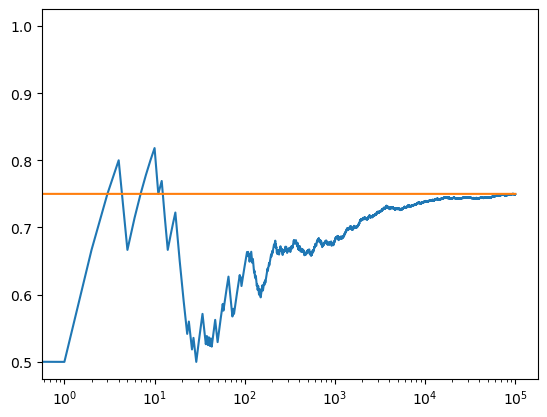

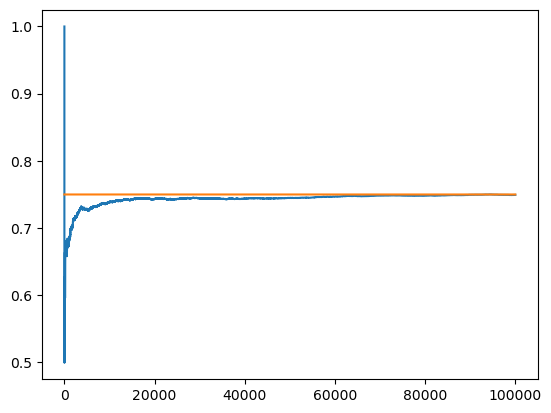

0.225
0.5072463768115943
0.7506376910562528
total reward earned: 74937.0
overall win rate: 0.74937
num times selected each bandit: [80.0, 345.0, 99578.0]


In [6]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
# https://books.google.ca/books?id=_ATpBwAAQBAJ&lpg=PA201&ots=rinZM8jQ6s&dq=hoeffding%20bound%20gives%20probability%20%22greater%20than%201%22&pg=PA201#v=onepage&q&f=false
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt


NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class Bandit:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = 0.
        self.N = 0 

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1. 
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

def ucb(mean, n, nj):
    return mean +np.sqrt(2*np.log(n)/nj)# TODO


def run_experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.empty(NUM_TRIALS)
    total_plays = 0
    
  # initialization: play each bandit once
    for j in range(len(bandits)):
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)
        
    for i in range(NUM_TRIALS):
        j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits]) # TODO
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)
        
        # for the plot
        rewards[i] = x
        
    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.xscale('log')
    plt.show()

    # plot moving average ctr linear
    plt.plot(cumulative_average)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

    for b in bandits:
        print(b.p_estimate)

    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N for b in bandits])

    return cumulative_average

if __name__ == '__main__':
    run_experiment()


#### Observations
1) The algorithm converges to the optimal bandit
2) The cummulative averages can be interpreted again
3) We didn't had to guess for an initial value
4) If the optimal bandit happens to be selected early in the iterations, the cummsum at that point may be higher than the convergence value
5) This is still not a bayesian approach, since it uses the knowshon 